<a href="https://colab.research.google.com/github/AFayad0/Image-Classification-with-CNNs-/blob/main/Knowledge_Discovery_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ResNet Model with Cropping Images


In [ ]:
# Import Libraries
import numpy as np 
import pandas as pd 
import torch
import torchvision 
import os
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import time
import copy
from torch.optim import lr_scheduler
from PIL import Image
import matplotlib.pyplot as plt
import csv
import cv2


In [ ]:
img = cv2.imread("/kaggle/input/aiunict-2023/train/01/01_002.png")
# Create a background subtractor
bg_subtractor = cv2.createBackgroundSubtractorMOG2()

# Apply the background subtractor to the image
mask = bg_subtractor.apply(img)

# Remove the background from the original image using the mask
img_without_bg = cv2.bitwise_and(img, img, mask=mask)

# Save the result
cv2.imwrite("5.png", img_without_bg)



True

In [ ]:
####### MORE CENTERED CROP #########
'''
# load csv file with image coordinates
csv_file = '/kaggle/input/aiunict-2023/train.csv'
df = pd.read_csv(csv_file)

# path to original images
img_folder = '/kaggle/input/aiunict-2023/train'

# path to new cropped images
cropped_folder = '/kaggle/working/train'

# create folders for cropped images if they don't exist
if not os.path.exists(cropped_folder):
    os.makedirs(cropped_folder)

# loop through rows in the dataframe
for index, row in df.iterrows():
    # get image name and coordinates from dataframe
    img_name = row['image']
    x1, y1, x2, y2 = row['x1'], row['y1'], row['x2'], row['y2']
    img_class = row['class']
    
    if(x1 < 1):
        continue
        
    # calculate center of bounding box
    center_x = (x1 + x2) // 2
    center_y = (y1 + y2) // 2
    
    # adjust coordinates for cropping
    crop_width = int((x2 - x1) * 0.5)  # crop more than half of the image
    crop_height = int((y2 - y1) * 0.5)  # crop more than half of the image
    crop_x1 = center_x - crop_width // 2
    crop_y1 = center_y - crop_height // 2
    crop_x2 = center_x + crop_width // 2
    crop_y2 = center_y + crop_height // 2    
    
    
 
        
    # path to original image and new cropped image
    img_path = os.path.join(img_folder, img_name)
    cropped_path = os.path.join(cropped_folder, f'0{img_class}')

    # read original image and crop it
    img = cv2.imread(img_path)
    cropped_img = img[crop_y1:crop_y2, crop_x1:crop_x2]

    # write cropped image to file
    if not os.path.exists(cropped_path):
        os.makedirs(cropped_path)
    cv2.imwrite(os.path.join(cropped_path, img_name.split('/')[-1]), cropped_img)
'''


In [ ]:
#try only class 0
'''
import cv2
import numpy as np
import pandas as pd
import os

# load csv file with image coordinates
csv_file = '/kaggle/input/aiunict-2023/train.csv'
df = pd.read_csv(csv_file)

# path to original images
img_folder = '/kaggle/input/aiunict-2023/train'

# path to new images
new_folder = '/kaggle/working/train'

# create folders for new images if they don't exist
if not os.path.exists(new_folder):
    os.makedirs(new_folder)

# loop through rows in the dataframe
for index, row in df.iterrows():
    # get image name and coordinates from dataframe
    img_name = row['image']
    x1, y1, x2, y2 = row['x1'], row['y1'], row['x2'], row['y2']
    img_class = row['class']

    # read original image
    img = cv2.imread(os.path.join(img_folder, img_name))
    
    # create mask with zeros
    mask = np.zeros(img.shape[:2], dtype=np.uint8)

    # draw bounding box on mask
    cv2.rectangle(mask, (x1, y1), (x2, y2), (255, 255, 255), -1)

    # blur and desaturate background outside of bounding box
    blur_radius = 99
    img_blurred = cv2.GaussianBlur(img, (blur_radius, blur_radius), 0)
    mask_inv = cv2.bitwise_not(mask)
    img_desaturated = cv2.cvtColor(img_blurred, cv2.COLOR_BGR2GRAY)
    img_desaturated = cv2.cvtColor(img_desaturated, cv2.COLOR_GRAY2BGR)
    img_background = cv2.bitwise_and(img_blurred, img_blurred, mask=mask_inv)
    img_background = cv2.cvtColor(img_background, cv2.COLOR_BGR2GRAY)
    img_background = cv2.cvtColor(img_background, cv2.COLOR_GRAY2BGR)
    
    # combine background and foreground inside of bounding box
    img_result = cv2.bitwise_or(img_background, img)
    
    if img_class != 0:
        img_result = img
    
    # save new image
    new_folder_class = os.path.join(new_folder, f'0{img_class}')
    if not os.path.exists(new_folder_class):
        os.makedirs(new_folder_class)
    cv2.imwrite(os.path.join(new_folder_class, img_name.split('/')[-1]), img_result)
'''

In [ ]:
##### Working BLACK Background


# load csv file with image coordinates
csv_file = '/kaggle/input/aiunict-2023/train.csv'
df = pd.read_csv(csv_file)

# path to original images
img_folder = '/kaggle/input/aiunict-2023/train'

# path to new images
new_folder = '/kaggle/working/train'

# create folders for new images if they don't exist
if not os.path.exists(new_folder):
    os.makedirs(new_folder)

# loop through rows in the dataframe
for index, row in df.iterrows():
    # get image name and coordinates from dataframe
    img_name = row['image']
    x1, y1, x2, y2 = row['x1'], row['y1'], row['x2'], row['y2']
    img_class = row['class']
    
    # read original image
    img_path = os.path.join(img_folder, img_name)
    img = cv2.imread(img_path)

    # create mask
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    mask[y1:y2, x1:x2] = 255

    # apply mask to original image to color the area inside the bounding box
    new_img = cv2.bitwise_and(img, img, mask=mask)

    #if img_class != 0:
        #new_img = img
    
    # write new image to file
    new_path = os.path.join(new_folder, f'0{img_class}')
    if not os.path.exists(new_path):
        os.makedirs(new_path)
    cv2.imwrite(os.path.join(new_path, img_name.split('/')[-1]), new_img)


In [ ]:
# with open('/kaggle/input/aiunict-2023/train.csv') as csv_file:
 #   csv_reader = csv.reader(csv_file)
 #   rows = list(csv_reader)

In [ ]:
#import shutil
#shutil.rmtree('/kaggle/working/test')

In [ ]:
# Specify transforms 
transformations = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize(224),
    #transforms.Resize(255),
    #transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Load in each dataset and apply transformations 
dataset = datasets.ImageFolder("/kaggle/working/train/", transform = transformations)
len(dataset)
train_set, val_set = torch.utils.data.random_split(dataset, [1300, 300])
print(len(train_set), len(val_set))


1300 300


In [ ]:
# Put into a Dataloader using torch library
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size =64, shuffle=True)

In [ ]:
dataloaders = {'train': train_loader,
               'val': val_loader}

dataset_sizes = {'train': len(train_set),
               'val': len(val_set)}

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_ft = models.resnet50(pretrained=True)
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 8)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------
train Loss: 0.5722 Acc: 0.8223
val Loss: 8.0796 Acc: 0.3367

Epoch 1/9
----------
train Loss: 0.1767 Acc: 0.9515
val Loss: 0.7277 Acc: 0.8467

Epoch 2/9
----------
train Loss: 0.1761 Acc: 0.9500
val Loss: 0.3601 Acc: 0.8767

Epoch 3/9
----------
train Loss: 0.2141 Acc: 0.9462
val Loss: 0.9821 Acc: 0.7433

Epoch 4/9
----------
train Loss: 0.1562 Acc: 0.9454
val Loss: 0.0788 Acc: 0.9733

Epoch 5/9
----------
train Loss: 0.1596 Acc: 0.9546
val Loss: 0.6823 Acc: 0.8200

Epoch 6/9
----------
train Loss: 0.1310 Acc: 0.9638
val Loss: 0.2502 Acc: 0.9433

Epoch 7/9
----------
train Loss: 0.0673 Acc: 0.9831
val Loss: 0.0450 Acc: 0.9867

Epoch 8/9
----------
train Loss: 0.0255 Acc: 0.9954
val Loss: 0.0246 Acc: 0.9967

Epoch 9/9
----------
train Loss: 0.0229 Acc: 0.9962
val Loss: 0.0340 Acc: 0.9900

Training complete in 2m 34s
Best val Acc: 0.996667


In [ ]:
#Process the image
def process_image(image_path):
    # Load Image
    img = Image.open(image_path)
    
    # Get the dimensions of the image
    width, height = img.size
    
    # Resize by keeping the aspect ratio, but changing the dimension
    # so the shortest size is 255px
    img = img.resize((255, int(255*(height/width))) if width < height else (int(255*(width/height)), 255))
    
    # Get the dimensions of the new image size
    width, height = img.size
    
    # Set the coordinates to do a center crop of 224 x 224
    #left = (width - 224)/2
    #top = (height - 224)/2
    #right = (width + 224)/2
    #bottom = (height + 224)/2
    #img = img.crop((left, top, right, bottom))
    
    # Turn image into numpy array
    img = np.array(img)
    
    # Make the color channel dimension first instead of last
    img = img.transpose((2, 0, 1))
    
    # Make all values between 0 and 1
    img = img/255
    
    # Normalize based on the preset mean and standard deviation
    img[0] = (img[0] - 0.485)/0.229
    img[1] = (img[1] - 0.456)/0.224
    img[2] = (img[2] - 0.406)/0.225
    
    # Add a fourth dimension to the beginning to indicate batch size
    img = img[np.newaxis,:]
    
    # Turn into a torch tensor
    image = torch.from_numpy(img)
    image = image.float()
    return image

In [ ]:
# Using the model to predict the label
def predict(image, model):
    # Pass the image through the model
    output = model.forward(image)
    
    # Reverse the log function in the output
    output = torch.exp(output)
    
    # Get the top predicted class, and the output percentage for
    # that class
    probs, classes = output.topk(1, dim=1)
    return probs.item(), classes.item()




In [ ]:
# Show Image
def show_image(image):
    # Convert image to numpy
    image = image.numpy()
    
    # Un-normalize the image
    image[0] = image[0] * 0.226 + 0.445
    
    # Print the image
    fig = plt.figure(figsize=(25, 4))
    plt.imshow(np.transpose(image[0], (1, 2, 0)))

In [ ]:
##### Working BLACK Background on TEST IMAGES


# load csv file with image coordinates
csv_file = '/kaggle/input/aiunict-2023/test.csv'
df = pd.read_csv(csv_file)

# path to original images
img_folder = '/kaggle/input/aiunict-2023/test'

# path to new cropped images
cropped_folder = '/kaggle/working/test'

# create folders for new images if they don't exist
if not os.path.exists(cropped_folder):
    os.makedirs(cropped_folder)

# loop through rows in the dataframe
for index, row in df.iterrows():
    # get image name and coordinates from dataframe
    img_name = row['image']
    x1, y1, x2, y2 = row['x1'], row['y1'], row['x2'], row['y2']
    #img_class = row['class']
    
    # read original image
    img_path = os.path.join(img_folder, img_name)
    img = cv2.imread(img_path)

    # create mask
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    mask[y1:y2, x1:x2] = 255

    # apply mask to original image to color the area inside the bounding box
    new_img = cv2.bitwise_and(img, img, mask=mask)

    #if img_class != 0:
        #new_img = img
    
    # write new image to file
    new_path = os.path.join(cropped_folder)
    if not os.path.exists(new_path):
        os.makedirs(new_path)
    cv2.imwrite(os.path.join(new_path, img_name.split('/')[-1]), new_img)


In [ ]:
##### MORE CENTERED TEST CROP ##########

# load csv file with image coordinates
csv_file = '/kaggle/input/aiunict-2023/test.csv'
df = pd.read_csv(csv_file)

# path to original images
img_folder = '/kaggle/input/aiunict-2023/test'

# path to new cropped images
cropped_folder = '/kaggle/working/test'

# create folders for cropped images if they don't exist
if not os.path.exists(cropped_folder):
    os.makedirs(cropped_folder)

# loop through rows in the dataframe
for index, row in df.iterrows():
    # get image name and coordinates from dataframe
    img_name = row['image']
    x1, y1, x2, y2 = row['x1'], row['y1'], row['x2'], row['y2']
    
    if(x1 < 1):
        continue

        
     # calculate center of bounding box
    center_x = (x1 + x2) // 2
    center_y = (y1 + y2) // 2
    
    # adjust coordinates for cropping
    crop_width = int((x2 - x1) * 0.6)  # crop more than half of the image
    crop_height = int((y2 - y1) * 0.6)  # crop more than half of the image
    crop_x1 = center_x - crop_width // 2
    crop_y1 = center_y - crop_height // 2
    crop_x2 = center_x + crop_width // 2
    crop_y2 = center_y + crop_height // 2   
        
        
    # path to original image and new cropped image
    img_path = os.path.join(img_folder, img_name)
    cropped_path = os.path.join(cropped_folder)

    # read original image and crop it
    img = cv2.imread(img_path)
    cropped_img = img[crop_y1:crop_y2, crop_x1:crop_x2]

    # write cropped image to file
    if not os.path.exists(cropped_path):
        os.makedirs(cropped_path)
    cv2.imwrite(os.path.join(cropped_path, img_name.split('/')[-1]), cropped_img)


The model is 56.31 % certain that the image has a predicted class of  0


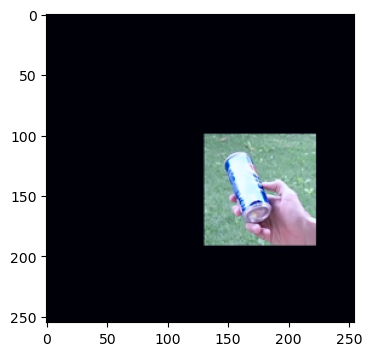

In [ ]:
# Process Image
#image = process_image("/kaggle/input/aiunict-2023/test/450.jpg")
image = process_image("/kaggle/working/test/112.jpg")

# Give image to model to predict output
model_ft = model_ft.to("cpu")
top_prob, top_class = predict(image, model_ft)
top_prob = top_prob / 10
# Show the image
show_image(image)
# Print the results
print("The model is %.2f" % top_prob, "% certain that the image has a predicted class of ", top_class  )

In [ ]:
# Define the test dataset class
class TestDataset(Dataset):
    def __init__(self, img_dir):
        self.img_dir = img_dir
        self.img_names = os.listdir(img_dir)
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    def __getitem__(self, index):
        img_path = os.path.join(self.img_dir, self.img_names[index])
        img = Image.open(img_path).convert('RGB')
        img = self.transform(img)
        return img, self.img_names[index]

    def __len__(self):
        return len(self.img_names)

# Create a DataLoader for the test dataset
test_dataset = TestDataset('/kaggle/working/test')
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


# Create a list to store the predicted outputs
pred_outputs = []

# Set the model to evaluation mode
model_ft.eval()

# Loop through the test DataLoader and get the predicted outputs
with torch.no_grad():
    for batch, (imgs, img_names) in enumerate(test_loader):
        # Move inputs to device
        imgs = imgs.to('cpu')

        # Forward pass through the model
        outputs = model_ft(imgs)

        # Get the predicted class index
        _, preds = torch.max(outputs, 1)

        # Append the predicted outputs to your list
        for i in range(len(preds)):
            pred_outputs.append((img_names[i], preds[i].item()))
            
        print(pred_outputs)

# Save the predicted outputs to a CSV file
with open('submission.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['image', 'class'])
    for output in pred_outputs:
        writer.writerow(output)


# Faster R-CNN Model

## Definitions



**Importing Libraries**

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import warnings
import cv2
from xml.etree import ElementTree as et
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch
import torchvision
from torchvision import transforms as torchtrans  
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
from albumentations.core.transforms_interface import ImageOnlyTransform
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
from PIL import Image
from torch.utils.data import random_split
from matplotlib import pyplot as plt
from numpy import asarray
from torchmetrics.classification import Accuracy


**Defining Custom Dataset**

In [ ]:
class MyDataset(Dataset):
    def __init__(self, root_dir, train=True,mask=False, transforms=None):
        self.split = "train" if train else "test"
        self.root_dir = Path(root_dir)/self.split
        self.transforms = transforms
        self.files = []
        self.mask=mask
        self.df_mask=pd.DataFrame()
        folders = sorted(os.listdir(self.root_dir))
        
        if self.split=="train" :
            if  mask:
                self.df_mask=pd.read_csv(root_dir+"train.csv")
            for folder in folders:
                class_idx= folders.index(folder)
                folder_dir = self.root_dir/folder
                files = os.listdir(folder_dir)
                if(class_idx==0):
                    for x in files:
                        self.files.append({"mask":folder+"/"+x,"file": folder_dir/x, "class": class_idx+1,"flag":False})
                else:
                    for x in files:
                        self.files.append({"mask":folder+"/"+x,"file": folder_dir/x, "class": class_idx+1,"flag":False})
        else:
            self.file=folders
            for file in folders:
                 self.files.append(self.root_dir/file)
    
    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, i):
        
        if self.split == "train":
            item = self.files[i]
            file = item['file']
            # reading the images and converting them to correct size and color    
            img = cv2.imread(str(file))
            img_res = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
            # diving by 255
            img_res /= 255.0
            # recover bounding boxes
            name_file_img=item['mask']
            mask_data=self.df_mask[self.df_mask["image"]==name_file_img]
            xmin=int(mask_data["x1"])+1
            ymin=int(mask_data["y1"])+1
            xmax=int(mask_data["x2"])-1
            ymax=int(mask_data["y2"])-1
            
            # resize bounding boxes
            boxes = []           
            boxes.append([xmin, ymin, xmax, ymax])
            # convert boxes into a torch.Tensor
            boxes = torch.as_tensor(boxes, dtype=torch.int64)            
            labels = torch.tensor(item['class'],dtype=torch.int64)
            labels=labels.unsqueeze(0)
            
            target = {}
            target["boxes"] = boxes
            target["labels"] = labels
                        
            if self.transforms:
            
                sample = {'image' : img_res,
                          'bboxes' : target['boxes'],
                          'labels' : labels
                         }
               
                sample = self.transforms(**sample)
                img_res = sample['image']
                target['boxes'] = torch.as_tensor((sample['bboxes']),dtype=torch.int64)
                
               
            return img_res, target
        else:
            file = self.files[i]
            img = cv2.imread(str(file))
            img_res = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
            img_res /= 255.0
            
            if self.transforms:
                sample = {
                    'image': img_res,
                }
                sample = self.transforms(**sample)
                image = sample['image']
                             
            return image,self.file[i]

**Defining Transformations**

In [ ]:
def train_transformations():
    return A.Compose([
        A.Flip(0.5),
        A.ShiftScaleRotate(shift_limit=0.2,scale_limit=0.25, rotate_limit=45, p=0.7),        
        ToTensorV2(p=1.0)
    ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

def test_transformations():
    return A.Compose([
        ToTensorV2(p=1.0)
    ])

## Training

**Creating Dataloaders**

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def collate_fn(batch):
    return tuple(zip(*batch))

root_dir = "../input/aiunict-2023/"
train_dataset = MyDataset(root_dir, train=True,mask=True, transforms= train_transformations())
train_data_loader = DataLoader(train_dataset,batch_size=8,shuffle=True,num_workers=4,collate_fn=collate_fn)


**Importing pretrained FasterRCNN Model**

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
classes_count = 9 
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, classes_count)

**Averager class to keep track of the average loss**

In [ ]:
class Averager:
    def __init__(self):
        self.current_total = 0.0
        self.iterations = 0.0

    def send(self, value):
        self.current_total += value
        self.iterations += 1

    @property
    def value(self):
        if self.iterations == 0:
            return 0
        else:
            return 1.0 * self.current_total / self.iterations

    def reset(self):
        self.current_total = 0.0
        self.iterations = 0.0

**Defining NMS technique to improve the results**

In [ ]:
def apply_nms(orig_prediction, iou_thresh=0.3):
    keep = torchvision.ops.nms(orig_prediction['boxes'], orig_prediction['scores'], iou_thresh)
    final_prediction = orig_prediction
    final_prediction['boxes'] = final_prediction['boxes'][keep]
    final_prediction['scores'] = final_prediction['scores'][keep]
    final_prediction['labels'] = final_prediction['labels'][keep]
    
    return final_prediction

**Setting parameters**

In [ ]:
model.to(device)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0001)
lr_scheduler =None

**Training Loop**

In [ ]:
num_epochs =  10 
loss_hist = Averager()
itr = 1
lossHistoryiter = []
lossHistoryepoch = []
true_lab=[]
import time
start = time.time()

for epoch in range(num_epochs):
    loss_hist.reset()
    model.train()
    for images, targets in train_data_loader:
        
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(images, targets)  
        
        losses = sum(loss for loss in loss_dict.values())
        loss_value = losses.item()
        
        loss_hist.send(loss_value)
        lossHistoryiter.append(loss_value)
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        if itr % 50 == 0:
            print(f"Iteration #{itr} loss: {loss_value}")

        itr += 1
    
    lossHistoryepoch.append(loss_hist.value)
    print(f"Epoch #{epoch} loss: {loss_hist.value}")
     
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Time taken to Train the model :{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

## Testing

**Creating Test Dataset**

In [ ]:
test_dataset = MyDataset(root_dir, train=False, transforms= test_transformations())

**Running the model on the test dataset and saving the CSV file**

In [ ]:
image_list=[]
class_list=[]
for idx in range(test_dataset.__len__()):
    img,name_file = test_dataset[idx]

    model.eval()
    with torch.no_grad():
        prediction = model([img.to(device)])[0]
    nms_prediction = apply_nms(prediction, iou_thresh=0.2)
    pred=nms_prediction['labels'].cpu().numpy()[0]
    
    image_list.append(name_file)
    class_list.append(pred-1)
    
d = {'image': image_list, 'class': class_list}
df = pd.DataFrame(data=d)
df.to_csv("submission.csv",index=False)